# Objective

* Predict whether the customer ( Applicant ) loan will be Reject or Approved 

* Yes = loan Reject , No =loan approved

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import matplotlib.pyplot as plt #visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns #visualization
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [2]:
import pandas as pd
Bank = pd.read_csv (r"C:\Users\dell\Downloads\Bank_Loan.csv")

In [3]:
#first few rows
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

#### 2.1. Data Type and conversion

In [4]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Loan_ID              981 non-null    object
 1   Age                  981 non-null    int64 
 2   Gender               957 non-null    object
 3   Married              978 non-null    object
 4   Dependents           981 non-null    int64 
 5   Education            981 non-null    object
 6   Self_Employed        926 non-null    object
 7   ApplicantIncome      981 non-null    int64 
 8   LoanAmount           981 non-null    int64 
 9   Previous_Loan_Taken  981 non-null    object
 10  Cibil_Score          981 non-null    int64 
 11  Property_Area        981 non-null    object
 12  Customer_Bandwith    981 non-null    object
 13  Tenure               981 non-null    int64 
 14  Loan_Status          981 non-null    object
dtypes: int64(6), object(9)
memory usage: 115.1+ KB


#### 2.2. Identifying & Treatment Missing Value

In [5]:
# count the number of NaN values in each column
Bank.isnull().sum()

Loan_ID                 0
Age                     0
Gender                 24
Married                 3
Dependents              0
Education               0
Self_Employed          55
ApplicantIncome         0
LoanAmount              0
Previous_Loan_Taken     0
Cibil_Score             0
Property_Area           0
Customer_Bandwith       0
Tenure                  0
Loan_Status             0
dtype: int64

### Replacing Missing value by Mode

In [6]:
Bank.Married.value_counts(dropna=False)

Yes    631
No     347
NaN      3
Name: Married, dtype: int64

In [7]:
for column in ['Gender','Married','Self_Employed']:
    Bank[column].fillna(Bank[column].mode()[0], inplace=True)

In [8]:
Bank.Married.value_counts(dropna=False)

Yes    634
No     347
Name: Married, dtype: int64

In [9]:
# count the number of NaN values in each column
print(Bank.isnull().sum())

Loan_ID                0
Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64


In [10]:
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


In [11]:
#Tenure to categorical column
def tenure_lab(Bank) :
    if Bank["Tenure"] <= 6 :
        return "Tenure_0_6"
    elif (Bank["Tenure"] > 6) & (Bank["Tenure"] <= 12 ):
        return "Tenure_7_12"
    elif (Bank["Tenure"] > 12) & (Bank["Tenure"] <= 24) :
        return "Tenure_13_24"
    elif (Bank["Tenure"] > 24) & (Bank["Tenure"] <= 36) :
        return "Tenure_25-36"
    elif Bank["Tenure"] > 36 :
        return "Tenure_gt_36"

Bank["Tenure_group"] = Bank.apply(lambda ab :tenure_lab(ab),axis = 1)

In [12]:
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status,Tenure_group
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No,Tenure_gt_36
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes,Tenure_13_24
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No,Tenure_7_12
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No,Tenure_7_12
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No,Tenure_7_12


In [13]:
Bank.Tenure_group.value_counts(dropna=False)

Tenure_gt_36    267
Tenure_13_24    266
Tenure_25-36    259
Tenure_7_12     131
Tenure_0_6       58
Name: Tenure_group, dtype: int64

In [14]:
((267+266+259)/981)*100

80.73394495412845

# Data Visualization

#### Bad Rate Analysis 

In [15]:
Bank.Loan_Status.value_counts()

No     712
Yes    269
Name: Loan_Status, dtype: int64

In [16]:
269/981

0.2742099898063201

In [17]:
import plotly.express as px

fig = px.pie(Bank,names='Loan_Status',color='Loan_Status',
             color_discrete_map={'Yes':'red',
                                 'No':'cyan'})
fig.show()

### Reject customer data 

In [18]:
Bank_Yes= Bank[Bank["Loan_Status"] == "Yes"]

Bank_Yes.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status,Tenure_group
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes,Tenure_13_24
7,LP001014,54,Male,Yes,1,Graduate,No,53213,368715,No,447,Semiurban,Bad,17,Yes,Tenure_13_24
9,LP001020,33,Male,Yes,0,Graduate,No,57348,347577,Yes,378,Semiurban,Bad,18,Yes,Tenure_13_24
13,LP001029,32,Male,No,4,Graduate,No,43208,309303,Yes,585,Rural,Medium,39,Yes,Tenure_gt_36
17,LP001036,45,Female,No,2,Graduate,No,27568,830422,No,659,Urban,Good,35,Yes,Tenure_25-36


In [19]:
fig = px.sunburst(Bank_Yes, path=["Gender",'Education','Self_Employed',
                                    'Tenure_group','Property_Area'])
fig.show()

### customer ==  male , urban, graduate, salaried & take less than a year

# 5. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 


In [20]:
Bank=Bank.drop('Loan_ID',axis=1)
Bank.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status,Tenure_group
0,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No,Tenure_gt_36
1,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes,Tenure_13_24
2,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No,Tenure_7_12
3,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No,Tenure_7_12
4,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No,Tenure_7_12


In [21]:
# Qualitative Variable
Quantitative_Variable = Bank[Bank.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,43,3,54005,334113,668,43
1,57,2,28817,736026,684,13
2,25,3,99939,712432,788,10


In [22]:
Qualitative_Variable = Bank[Bank.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Tenure_group
0,Male,No,Graduate,No,Yes,Urban,Good,No,Tenure_gt_36
1,Male,Yes,Graduate,No,Yes,Rural,Good,Yes,Tenure_13_24
2,Male,Yes,Graduate,Yes,Yes,Urban,Good,No,Tenure_7_12


### Converting qualitative Variable into number

In [23]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Tenure_group
0,1,0,0,0,1,2,1,0,4
1,1,1,0,0,1,0,1,1,1
2,1,1,0,1,1,2,1,0,3
3,1,1,1,0,1,2,1,0,3
4,1,0,0,0,1,2,1,0,3


## Combining the data set 

In [24]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,1,0,0,0,1,2,1,0,4,43,3,54005,334113,668,43
1,1,1,0,0,1,0,1,1,1,57,2,28817,736026,684,13
2,1,1,0,1,1,2,1,0,3,25,3,99939,712432,788,10
3,1,1,1,0,1,2,1,0,3,44,1,38470,267161,888,9
4,1,0,0,0,1,2,1,0,3,58,1,28991,402474,703,11


# Data Partition 

In [25]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Loan_Status', axis = 1)
Y = Final_combined[['Loan_Status']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model building 

# Hypothesis

* H0 :- There is no log linear relationship between Loan_Status and all independent Variable

Vs 

* H1 :- There is log linear relationship between Loan_Status and all independent Variable

Alpha = 0.05 (5%)

In [26]:
X_train.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9


# Needed to run the logistic regression
import statsmodels.formula.api as smf
result=smf.logit("Loan_Status~C(Gender)+C(Married)+C(Education)+C(Self_Employed)+C(Previous_Loan_Taken)+C(Property_Area)+C(Customer_Bandwith)+C(Tenure_group)+Age+Dependents+LoanAmount+Cibil_Score+ApplicantIncome",data=train).fit()
print(result.summary2())

# Method 2 - Logistics Regression

In [27]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
X_1 = sm.add_constant(X_train)  ## give intercept coefficient in the model
result=sm.Logit(y_train,X_1).fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.314729
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.472     
Dependent Variable:  Loan_Status       AIC:               523.4944  
Date:                2022-09-08 00:21  BIC:               593.4605  
No. Observations:    784               Log-Likelihood:    -246.75   
Df Model:            14                LL-Null:           -467.20   
Df Residuals:        769               LLR p-value:       2.9770e-85
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               10.5944   1.2675   8.3584 0.0000  8.1101 13.0787
Gender              -0.1708 

* There is log linear relationship between Loan_Status and Married,Previous_Loan_Taken,Customer_Bandwith,Cibil_Score

# Backward method

In [28]:
cols = list(X.columns)    # columns name
pmax = 1        # one variable
while (len(cols)>0):  # count of variable should be greater than zero
    p= []             # empty list
    X_1 = X_train[cols]  # all column we are assign in x_1
    X_1 = sm.add_constant(X_1)# adding a column with value 1
    output=sm.Logit(y_train,X_1).fit() # Regression model
    p = pd.Series(output.pvalues.values[1:],index = cols) # to get p-values for all variable only     
    pmax = max(p)  # select a max P-value = 0.86
    feature_with_p_max = p.idxmax()   # education
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

Optimization terminated successfully.
         Current function value: 0.314729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314853
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315139
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315573
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315886
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316571
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317286
  

In [29]:
output.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.464     
Dependent Variable:  Loan_Status       AIC:               510.5313  
Date:                2022-09-08 00:21  BIC:               533.8533  
No. Observations:    784               Log-Likelihood:    -250.27   
Df Model:            4                 LL-Null:           -467.20   
Df Residuals:        779               LLR p-value:       1.3356e-92
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               10.6026   1.0567  10.0336 0.0000  8.5315 12.6737
Married             -0.5461   0.2375  -2.2995 0.0215 -1.0116 -0.0806
Previous_Loan_Taken -3.9325   0.3468 -11.3381 0.0000 -4.6123 -3.2527
Customer_Bandwith   -0.7556   0.2382  -3.1725 0.0015 -1.2223 -0.2888
Cibil_Score         -0.0104   0.0012  -8.8668 0.0000 -0.0127 -0.0081
====================================================================

"""

* There is log linear relationship between Loan_Status and Married,Previous_Loan_Taken,Customer_Bandwith,Cibil_Score

# Step 6 : Predictions on Train Dataset

In [30]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0


In [31]:
train['Probability']=output.predict(X_1)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,Probability
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0,0.130245
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0,0.106482
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0,0.048887
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1,0.999260
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0,0.050356


In [32]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,Probability,Predicted
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0,0.130245,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0,0.106482,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0,0.048887,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1,0.999260,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0,0.050356,0


# Step 7 : Model Performance Metrics

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Loan_Status'])
print(matrix)

[[550  80]
 [ 12 142]]


In [34]:
Accuracy_Train=((550+142)/(784)*100)
print(Accuracy_Train)

88.26530612244898


* Accuracy of Model is 88% , So we say Model good fit data  

In [35]:
from sklearn.metrics import classification_report
print(classification_report(train['Loan_Status'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       562
           1       0.92      0.64      0.76       222

    accuracy                           0.88       784
   macro avg       0.90      0.81      0.84       784
weighted avg       0.89      0.88      0.88       784



* Accuracy of Bad Customer Capture by Model is 64% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 98% 

# Step 8 : Predictions on Test Dataset

In [36]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0


In [37]:
X_test = sm.add_constant(X_test)
X_test.head()

,const,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
607,1.0,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31
401,1.0,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23
634,1.0,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21
98,1.0,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12
143,1.0,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29


In [38]:
abc=X_test[['const', 'Married','Customer_Bandwith','Previous_Loan_Taken','Cibil_Score']]
abc.head(2)

,const,Married,Customer_Bandwith,Previous_Loan_Taken,Cibil_Score
607,1.0,1,1,1,707
401,1.0,0,0,1,415


In [39]:
test['Probability']=output.predict(abc)
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,Probability
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0,0.122231
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1,0.996083
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0,0.034163
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0,0.027103
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0,0.005275


In [40]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,Probability,Predicted
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0,0.122231,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1,0.996083,1
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0,0.034163,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0,0.027103,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0,0.005275,0


# Step 9 : Model Performance Metrics on Test data 

In [41]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Loan_Status'])
print(matrix)

[[150  37]
 [  0  10]]


In [42]:
Accuracy_test=((150+10)/(197)*100)
Accuracy_test

81.21827411167513

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test['Loan_Status'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       150
           1       1.00      0.21      0.35        47

    accuracy                           0.81       197
   macro avg       0.90      0.61      0.62       197
weighted avg       0.85      0.81      0.76       197



# Decision Tree

In [44]:
Final_combined.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,1,0,0,0,1,2,1,0,4,43,3,54005,334113,668,43
1,1,1,0,0,1,0,1,1,1,57,2,28817,736026,684,13
2,1,1,0,1,1,2,1,0,3,25,3,99939,712432,788,10
3,1,1,1,0,1,2,1,0,3,44,1,38470,267161,888,9
4,1,0,0,0,1,2,1,0,3,58,1,28991,402474,703,11


## data partition

In [45]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Loan_Status', axis = 1)
Y = Final_combined[['Loan_Status']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

In [46]:
# import tree classifier model
from sklearn import tree
dt=tree.DecisionTreeClassifier()  #by default it usses gini index for splitting
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## plotting the Tree

In [47]:
features = list(Final_combined.columns[1:])
features

['Married',
 'Education',
 'Self_Employed',
 'Previous_Loan_Taken',
 'Property_Area',
 'Customer_Bandwith',
 'Loan_Status',
 'Tenure_group',
 'Age',
 'Dependents',
 'ApplicantIncome',
 'LoanAmount',
 'Cibil_Score',
 'Tenure']

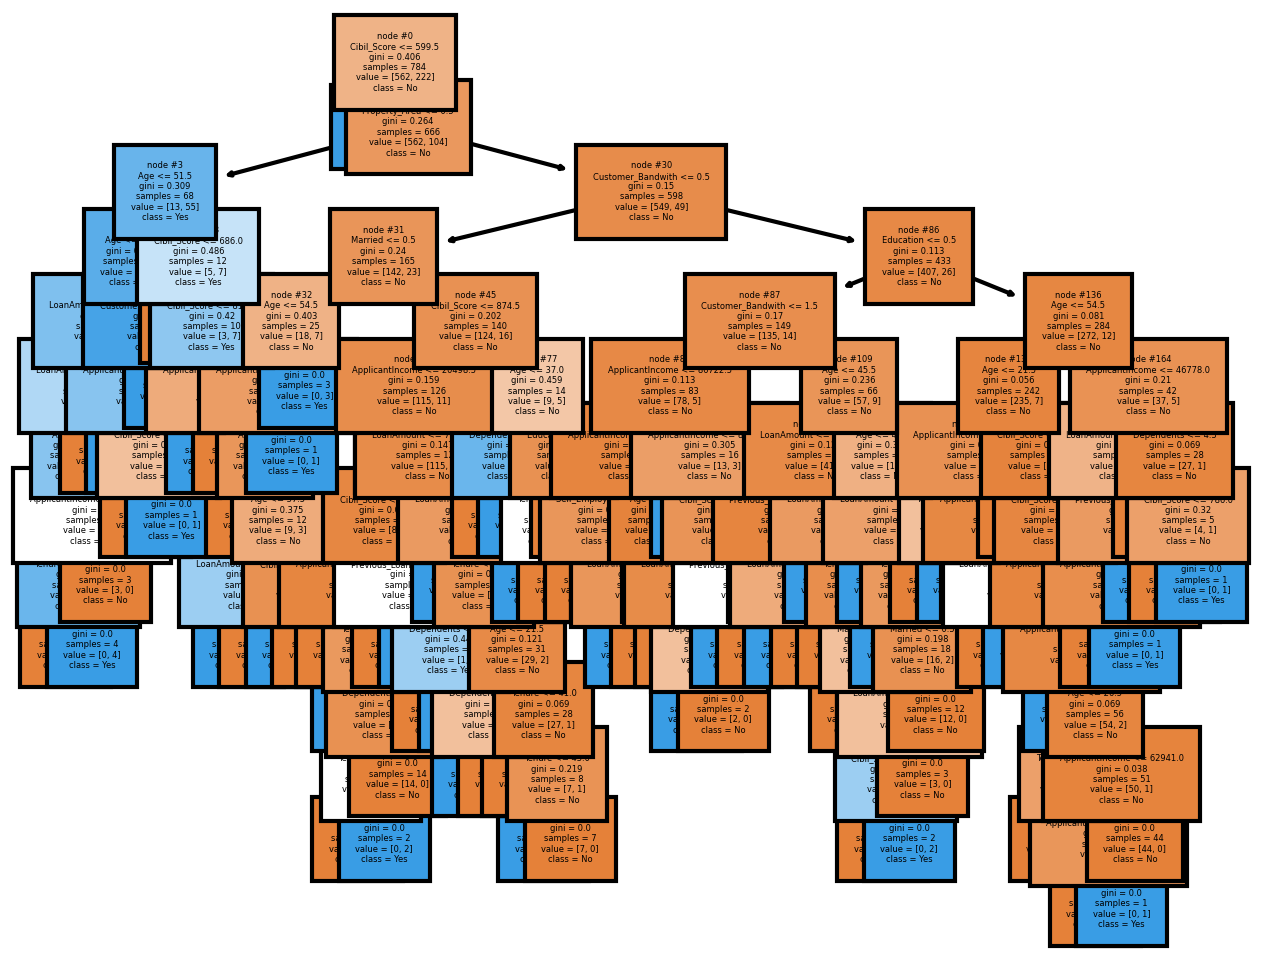

In [48]:
from sklearn import tree
import matplotlib.pyplot as plt

Loan_Status=['No','Yes']# array
fig, axes =plt.subplots(nrows=1,ncols=1,figsize=(5,4),dpi=300)
tree.plot_tree(dt,
              feature_names=features,
              class_names=Loan_Status,
              filled=True,
              node_ids=True,
              fontsize=2);


## pridiction on train data

In [49]:
train =pd.concat([X_train,y_train],axis=1)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0


In [50]:
train['predicted']=dt.predict(X_train)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,predicted
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0,0


## Model Performence Matrix

In [51]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(train['predicted'],train['Loan_Status'])
print(matrix)

[[562   0]
 [  0 222]]


## final accuracy before prunning

In [52]:
train_accuracy=((562+222)/(562+222+0+0))*100
print(train_accuracy)

100.0


## final accuracy after prunning

In [53]:
train_accuracy=((549+173)/(549+49+13+173))*100
print(train_accuracy)

92.09183673469387


## pridiction on test data

In [54]:

test=pd.concat([X_test,y_test],axis=1)
test.head()


,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0


In [55]:
test['Predicted']=dt.predict(X_test)
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,Predicted
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1,1
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0,0


## model performance on test data

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Loan_Status'])
print(confusion_matrix)

KeyError: 'Predicted'

In [86]:
test_accuracy=((143+41)/(143+6+7+41))*100
print(test_accuracy)

93.4010152284264


## Sensitivity & Specificity

## train

In [83]:
from sklearn.metrics import classification_report
print(classification_report(train['predicted'],train['Loan_Status']))

KeyError: 'predicted'

## test

In [84]:
from sklearn.metrics import classification_report
print(classification_report(test['Predicted'],test['Loan_Status']))

KeyError: 'Predicted'

## grid search method

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,300,400], ## Parent 
           'min_samples_leaf': [30,40,100], ## Child or Leave 
           'max_depth':[4,5,6]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [30, 40, 100],
                         'min_samples_split': [100, 200, 300, 400]},
             verbose=1)

In [61]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=100,
                       random_state=42)

## model improve my prunning method

In [62]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=30, ## child
                                 min_samples_split=100, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=100)

# KNN Algorithms

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## pridiction on train data

In [64]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0


In [65]:
train['prediction']=knn.predict(X_train)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,prediction
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0,1
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0,0


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(train['Loan_Status'],train['prediction'])
print(confusion_matrix)

[[513  49]
 [108 114]]


In [67]:
accuracy_train=((513+114)/(513+49+108+114))*100
print(accuracy_train)

79.97448979591837


## test pridictions

In [68]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0


In [69]:
test['pridict']=knn.predict(X_test)
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,pridict
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1,0
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0,1


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(test['Loan_Status'],test['pridict'])
print(confusion_matrix)

[[119  31]
 [ 39   8]]


In [71]:
accuracy_test=((119+8)/(119+31+39+8))*100
print(accuracy_test)

64.46700507614213


# Naive bayes 

In [72]:
from sklearn.naive_bayes import GaussianNB
ngb=GaussianNB()
ngb.fit(X_train,y_train)

GaussianNB()

## train data pridiction

In [73]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0


In [74]:
train['predict']=ngb.predict(X_train)
train.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,predict
920,1,1,0,1,1,0,1,4,29,3,98044,514905,700,47,0,0
666,1,1,0,0,1,1,1,4,20,1,40361,203352,722,46,0,0
797,0,1,0,0,1,0,1,3,26,0,81575,180754,803,9,0,0
925,0,0,0,0,0,0,0,0,49,5,30054,351494,327,6,1,1
735,1,1,0,0,1,0,1,4,38,4,53256,336285,800,45,0,0


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(train['Loan_Status'],train['predict'])
print(confusion_matrix)

[[562   0]
 [110 112]]


In [76]:
accuracy=((562+112)/(562+110+112))*100
print(accuracy)

85.96938775510205


In [77]:
from sklearn.metrics import classification_report
print(classification_report(train['predict'],train['Loan_Status']))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       672
           1       0.50      1.00      0.67       112

    accuracy                           0.86       784
   macro avg       0.75      0.92      0.79       784
weighted avg       0.93      0.86      0.88       784



## test data pridiction

In [78]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0


In [79]:
test['predict']=ngb.predict(X_test)
test.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Tenure_group,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Loan_Status,predict
607,1,1,1,0,1,0,1,2,36,4,34747,374750,707,31,0,0
401,1,0,1,0,1,0,0,1,32,2,99459,755401,415,23,1,1
634,1,1,1,0,1,2,1,1,30,3,73468,234542,839,21,0,0
98,1,1,1,0,1,1,1,3,33,1,63519,788684,862,12,0,0
143,1,1,0,0,1,1,2,2,52,2,54231,170898,643,29,0,0


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(test['Loan_Status'],test['predict'])
print(confusion_matrix)

[[150   0]
 [ 23  24]]


In [81]:
accuracy=((150+24)/(150+24+23))*100
print(accuracy)

88.3248730964467


In [82]:
from sklearn.metrics import classification_report
print(classification_report(test['predict'],test['Loan_Status']))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       173
           1       0.51      1.00      0.68        24

    accuracy                           0.88       197
   macro avg       0.76      0.93      0.80       197
weighted avg       0.94      0.88      0.90       197



# Finish

# Automation

import os 
os.chdir(r"C:\Users\User\Desktop\Python Code\End_to_End Project\Bank_loan_logistics")

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
output = LogisticRegression()
output.fit(X_train, y_train)

import pickle
# Saving model
#pickle.dump(output, open('build.pkl','wb'))
model=pickle.load(open('build.pkl','rb'))

model.predict([[1,0,0,0,1,2,1,43,3,54005,334113,668,43]])

model.predict([[1,0,1,0,1,0,1,32,2,99459,755401,415,23]])